In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from pandas import read_csv
filename = "bank.csv"
data = read_csv(filename)

In [2]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [3]:
data.shape

(11162, 17)

Veri setinde 11162 gözlem, 17 değişken bulunmaktadır.

In [4]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Veri setinde kayıp veri bulunmamaktadır.

In [6]:
önbilgi = data.groupby("deposit").size()
print(önbilgi)

deposit
no     5873
yes    5289
dtype: int64


In [7]:
önbilgi2 = data.groupby("marital").size()
print(önbilgi2)

marital
divorced    1293
married     6351
single      3518
dtype: int64


In [5]:
önbilgi3 = data.groupby("housing").size()
print(önbilgi3)

housing
0    5881
1    5281
dtype: int64


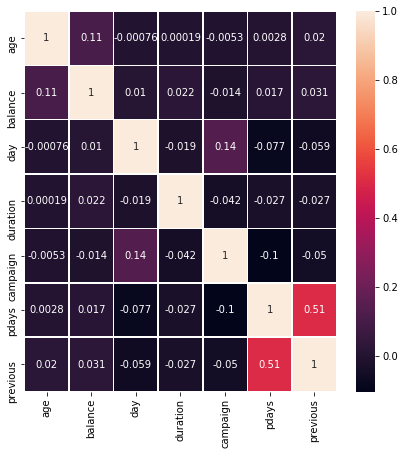

In [8]:
j = data.corr()
f, ax = plt.subplots(figsize = (7, 7))
sns.heatmap(j, annot = True, linewidths = .5, ax = ax)

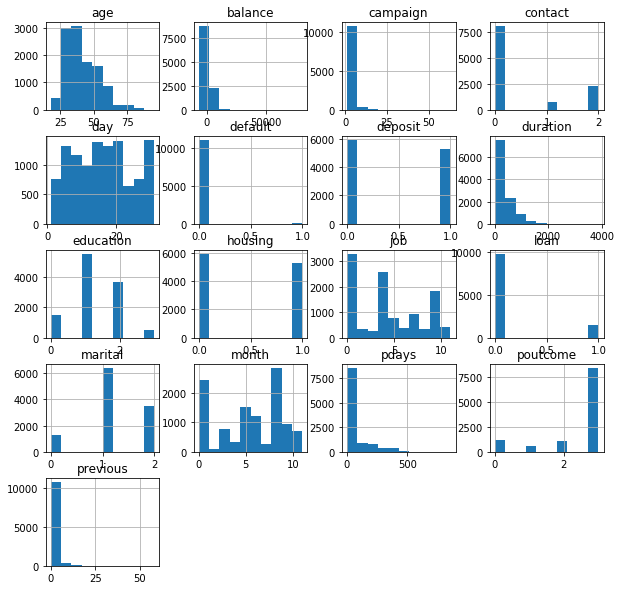

In [4]:
data.hist(figsize = (10, 10))
plt.show()

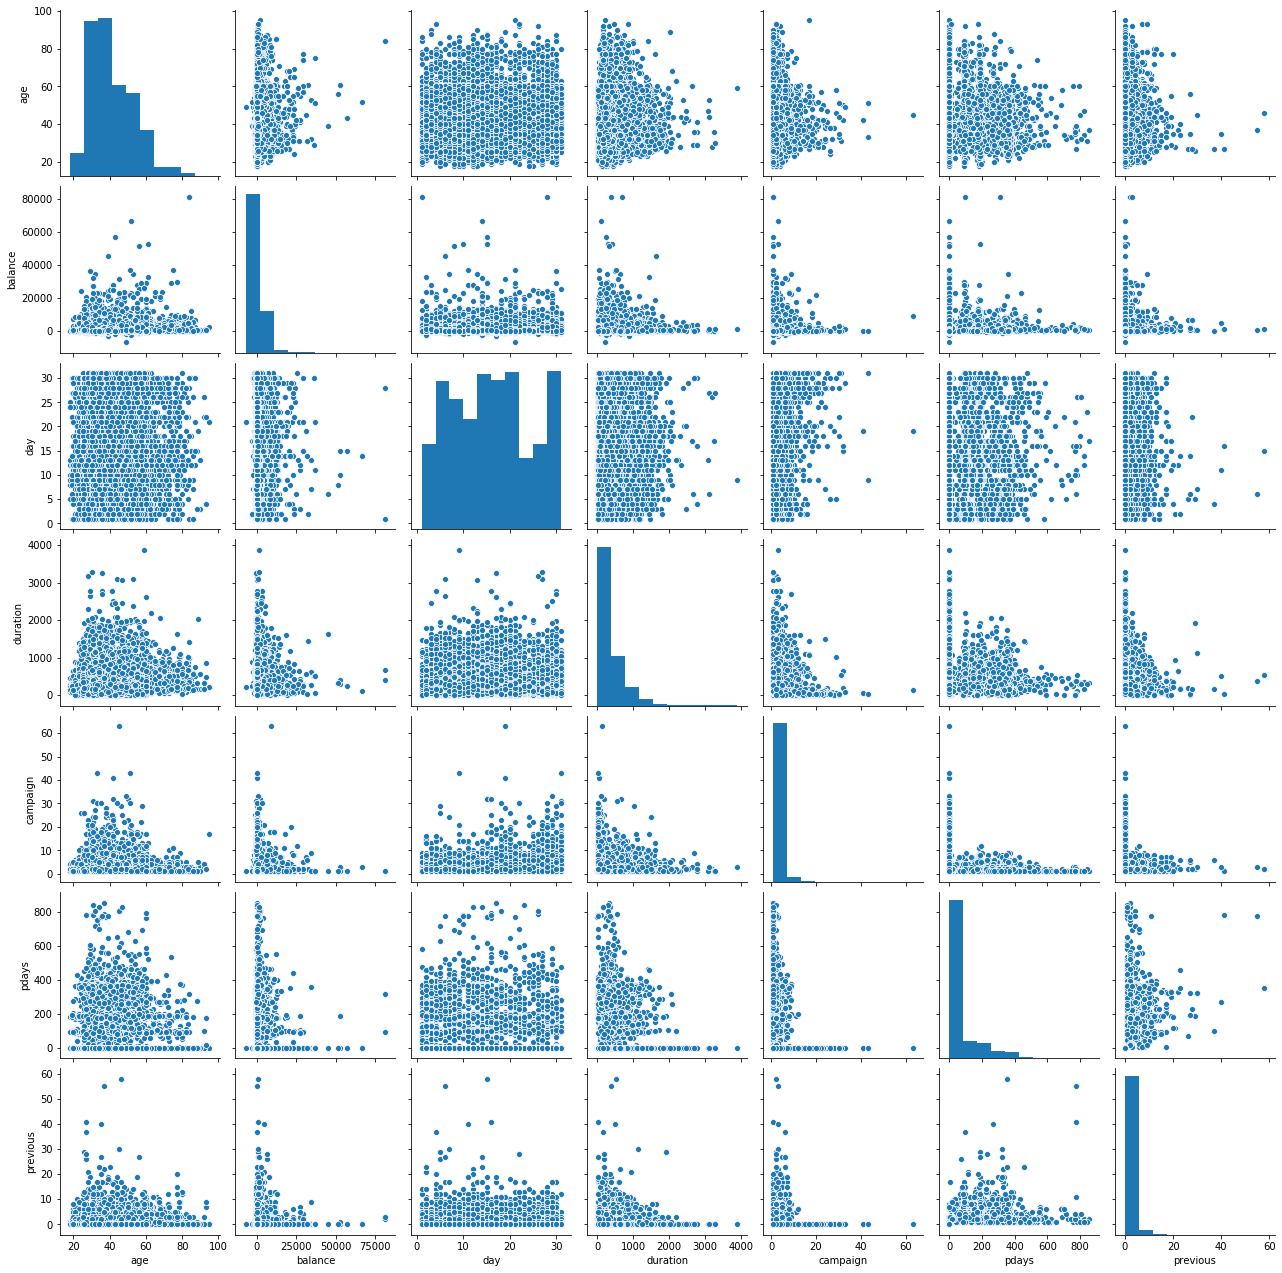

In [10]:
sns.pairplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E656669788>]],
      dtype=object)

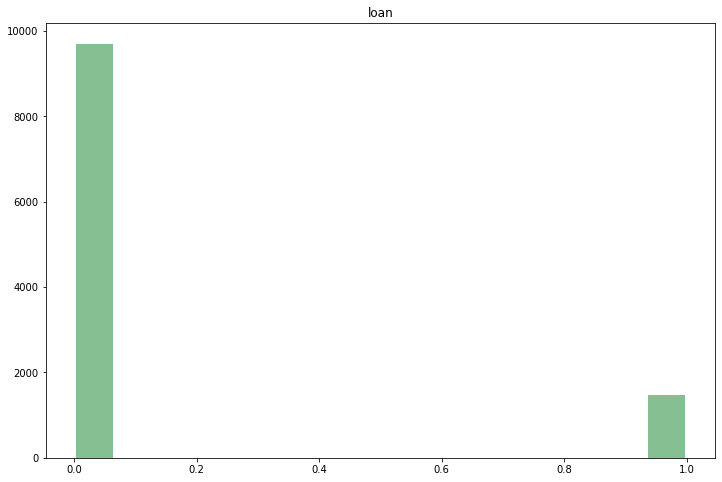

In [6]:
data.hist(column = "loan", bins = 15, grid = False, figsize = (12,8), color = "#86bf91", zorder = 2, rwidth = 0.9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020957141108>]],
      dtype=object)

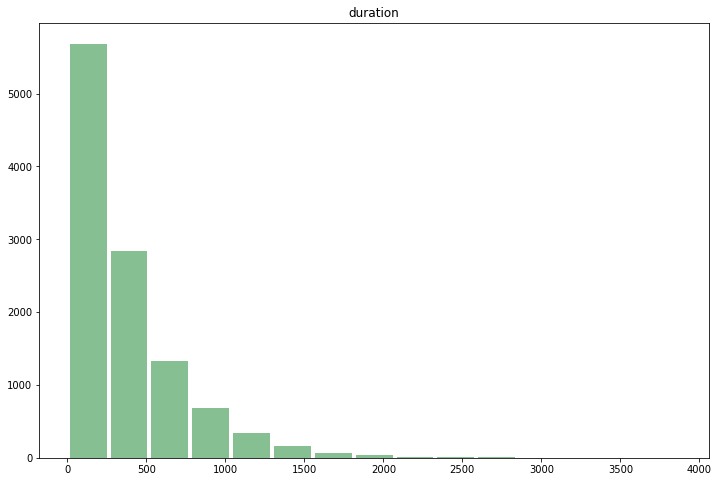

In [12]:
data.hist(column = "duration", bins = 15, grid = False, figsize = (12,8), color = "#86bf91", zorder = 2, rwidth = 0.9)

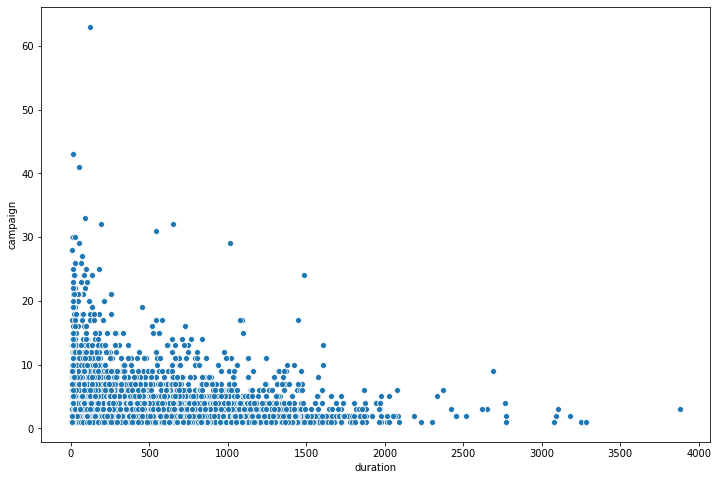

In [13]:
fig, ax1 = plt.subplots(figsize = (12, 8))
sns.scatterplot(x = "duration", y = "campaign", data = data, ax = ax1)

                                                    MODELLEME

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['job'] = le.fit_transform(data['job'])
data['marital'] = le.fit_transform(data['marital'])
data['education'] = le.fit_transform(data['education'])
data['contact'] = le.fit_transform(data['contact'])
data['poutcome'] = le.fit_transform(data['poutcome'])
data['month'] = le.fit_transform(data['month'])
data['default'] = le.fit_transform(data['default'])
data['housing'] = le.fit_transform(data['housing'])
data['loan'] = le.fit_transform(data['loan'])
data['deposit'] = le.fit_transform(data['deposit'])

In [15]:
X = data.drop(["deposit"], axis = 1) #Girdi değişkeni
Y = data["deposit"] #Çıktı

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y ,test_size = 0.3, random_state = 0)

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver= "lbfgs", max_iter = 4000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred1 = model.predict(x_train)

In [18]:
from sklearn.metrics import accuracy_score
print("Eğitim Verisi İçin Doğruluk Oranı: ", accuracy_score(y_pred1, y_train))
print("Test Verisi İçin Doğruluk Oranı  : ", accuracy_score(y_pred, y_test))

Eğitim Verisi İçin Doğruluk Oranı:  0.7964930244464354
Test Verisi İçin Doğruluk Oranı  :  0.7915795759928337


In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [20]:
#Normalize edilmiş veri seti için modelleme
model1 = LogisticRegression(solver= "lbfgs", max_iter = 1000)
model1.fit(x_train_std, y_train)

y_pred = model1.predict(x_test_std)
y_pred1 = model1.predict(x_train_std)
print("Eğitim Verisi İçin Doğruluk Oranı: ", accuracy_score(y_pred1, y_train))
print("Test Verisi İçin Doğruluk Oranı  : ", accuracy_score(y_pred, y_test))

Eğitim Verisi İçin Doğruluk Oranı:  0.8008447459362601
Test Verisi İçin Doğruluk Oranı  :  0.7945655419528217


In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred1 = knn.predict(x_train)
print("Eğitim Verisi İçin Doğruluk Oranı: ", accuracy_score(y_pred1, y_train))
print("Test Verisi İçin Doğruluk Oranı  : ", accuracy_score(y_pred, y_test))

Eğitim Verisi İçin Doğruluk Oranı:  0.8156917957250736
Test Verisi İçin Doğruluk Oranı  :  0.7354434159450582


In [22]:
import time
for a in range(1,11):
    tic = time.time()
    knn = KNeighborsClassifier(n_neighbors = a)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    y_pred1 = knn.predict(x_train)
    print("k = ", a)
    print("Eğitim Verisi İçin Doğruluk Oranı: ", accuracy_score(y_pred1, y_train))
    print("Test Verisi İçin Doğruluk Oranı  : ", accuracy_score(y_pred, y_test))
    toc = time.time()
    print(toc-tic, "sn. geçti\n")
    print("\n")

k =  1
Eğitim Verisi İçin Doğruluk Oranı:  1.0
Test Verisi İçin Doğruluk Oranı  :  0.7028963869811884
1.0427989959716797 sn. geçti



k =  2
Eğitim Verisi İçin Doğruluk Oranı:  0.842570075515167
Test Verisi İçin Doğruluk Oranı  :  0.6942370856972231
1.0860211849212646 sn. geçti



k =  3
Eğitim Verisi İçin Doğruluk Oranı:  0.8484576987072827
Test Verisi İçin Doğruluk Oranı  :  0.7288742908330845
1.1060268878936768 sn. geçti



k =  4
Eğitim Verisi İçin Doğruluk Oranı:  0.8174836810444132
Test Verisi İçin Doğruluk Oranı  :  0.7181248133771275
1.1371042728424072 sn. geçti



k =  5
Eğitim Verisi İçin Doğruluk Oranı:  0.8156917957250736
Test Verisi İçin Doğruluk Oranı  :  0.7354434159450582
1.091817855834961 sn. geçti



k =  6
Eğitim Verisi İçin Doğruluk Oranı:  0.804300524766415
Test Verisi İçin Doğruluk Oranı  :  0.7318602567930725
1.089841604232788 sn. geçti



k =  7
Eğitim Verisi İçin Doğruluk Oranı:  0.8031485984896967
Test Verisi İçin Doğruluk Oranı  :  0.743505524037026
1.1061589

En iyi sonucu k = 10 ile aldığımızı söyleyebiliriz.

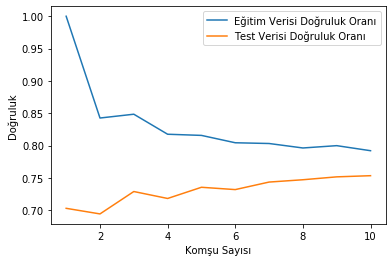

In [23]:
import matplotlib.pyplot as plt
egitim_accuracy = []
test_accuracy = []
komsu_sayisi = range(1,11)
for a in komsu_sayisi:
    clf = KNeighborsClassifier(n_neighbors = a)
    clf.fit(x_train, y_train)
    egitim_accuracy.append((clf.score(x_train, y_train)))
    test_accuracy.append((clf.score(x_test, y_test)))
    
plt.plot(komsu_sayisi, egitim_accuracy, label="Eğitim Verisi Doğruluk Oranı")
plt.plot(komsu_sayisi, test_accuracy, label="Test Verisi Doğruluk Oranı")
plt.ylabel("Doğruluk")
plt.xlabel("Komşu Sayısı")
plt.legend()

In [24]:
#Çapraz doğrulama
from sklearn.model_selection import cross_val_score
cv_scores = []

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

scores = cross_val_score(knn, x_train, y_train, cv = 10, scoring = "accuracy")
print("Skorlar      : ", scores, "\n")
print("Ortalama Skor: ",scores.mean())

Skorlar      :  [0.77237852 0.73273657 0.73913043 0.77848912 0.76568502 0.73751601
 0.74263764 0.75544174 0.73111396 0.73367478] 

Ortalama Skor:  0.7488803782939442


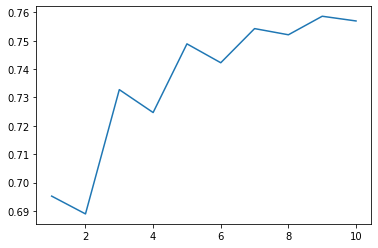

In [25]:
#Çapraz doğrulama ile parametre optimizasyonunun birlikte kullanacağım.
k_range = range(1,11)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x_train, y_train, cv = 10, scoring = "accuracy")
    k_scores.append(scores.mean())
    
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel = ("KNN için Komşu Değerleri(k)")
plt.ylabel = ("CV ile Elde Edilen Doğruluk Oranları")
plt.show()

In [26]:
# 3- NAIVE BAYES (koşullu olasılık)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_std, y_train)

y_pred = nb.predict(x_test_std)
y_pred1 = nb.predict(x_train_std)

print("Eğitim Verisi için Doğruluk Oranı: ", accuracy_score(y_pred1, y_train))
print("\n")
print("Test Verisi için Doğruluk Oranı  : ", accuracy_score(y_pred, y_test))

Eğitim Verisi için Doğruluk Oranı:  0.7529758095481889


Test Verisi için Doğruluk Oranı  :  0.7372349955210511


In [27]:
from sklearn.svm import SVC
clf = SVC(kernel = "linear", C = 1) 
clf.fit(x_train_std, y_train)
y_pred = clf.predict(x_test_std)
y_pred1 = clf.predict(x_train_std)
print("Eğitim Verisi için Doğruluk Oranı: ", accuracy_score(y_pred1, y_train))
print("\n")
print("Test Verisi için Doğruluk Oranı  : ", accuracy_score(y_pred, y_test))

Eğitim Verisi için Doğruluk Oranı:  0.8012287213618329


Test Verisi için Doğruluk Oranı  :  0.7984472977008062


In [28]:
for aa in [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]:
    clf = SVC(kernel = "rbf", gamma = aa)
    clf.fit(x_train_std, y_train)
    y_pred = clf.predict(x_test_std)
    y_pred1 = clf.predict(x_train_std)
    
    print("gamma = ", aa, "\n")
    print("Eğitim Verisi için Doğruluk Oranı: ", accuracy_score(y_pred1, y_train))
    print("Test Verisi için Doğruluk Oranı  : ", accuracy_score(y_pred, y_test))
    print("\n")


gamma =  0.001 

Eğitim Verisi için Doğruluk Oranı:  0.799820811468066
Test Verisi için Doğruluk Oranı  :  0.7945655419528217


gamma =  0.01 

Eğitim Verisi için Doğruluk Oranı:  0.8185076155126072
Test Verisi için Doğruluk Oranı  :  0.8106897581367573


gamma =  0.05 

Eğitim Verisi için Doğruluk Oranı:  0.8362984768974786
Test Verisi için Doğruluk Oranı  :  0.8196476560167214


gamma =  0.1 

Eğitim Verisi için Doğruluk Oranı:  0.8542173300908742
Test Verisi için Doğruluk Oranı  :  0.8205434458047178


gamma =  0.5 

Eğitim Verisi için Doğruluk Oranı:  0.9456034813771919
Test Verisi için Doğruluk Oranı  :  0.7930725589728277


gamma =  1 

Eğitim Verisi için Doğruluk Oranı:  0.9791373352105466
Test Verisi için Doğruluk Oranı  :  0.7506718423409973


gamma =  5 

Eğitim Verisi için Doğruluk Oranı:  0.9993600409573787
Test Verisi için Doğruluk Oranı  :  0.5721110779337115


gamma =  10 

Eğitim Verisi için Doğruluk Oranı:  1.0
Test Verisi için Doğruluk Oranı  :  0.5476261570618095


g

En başarılı sonucu gamma = 0.01 değeri ile alındığı söylenebilir.

In [29]:
# 5- KARAR AĞACI
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 4)
dtc.fit(x_train, y_train)
pred = dtc.predict(x_test)
pred1 = dtc.predict(x_train)

print("Eğitim Verisi için Doğruluk Oranı: ", accuracy_score(pred1, y_train))
print("Test Verisi için Doğruluk Oranı: \n", accuracy_score(pred, y_test))

Eğitim Verisi için Doğruluk Oranı:  0.7950851145526686


Test Verisi için Doğruluk Oranı:  0.7844132576888624


In [30]:
#Görselleştirme
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (30, 30), dpi = 600)
tree.plot_tree(dtc);